In [2]:
import os
import cv2
#케라스 모델 생성 라이브러리
from tensorflow import keras
from tensorflow.keras import models
#레이어 생성 라이브러리(Dense: 입출력 연결)
from tensorflow.keras import layers

In [3]:
#numpy
import numpy as np
from numpy import array

In [4]:
#케라스 카테고르 라이브러리
from tensorflow.keras.utils import to_categorical
#시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#미리 섞여진 fashion-mnist의 학습데이터와 테스트 데이터 로드
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
#학습셋과 테스트셋의 데이터 갯수
print(x_train.shape[0],'train set')
print(x_test.shape[0], 'test set')

60000 train set
10000 test set


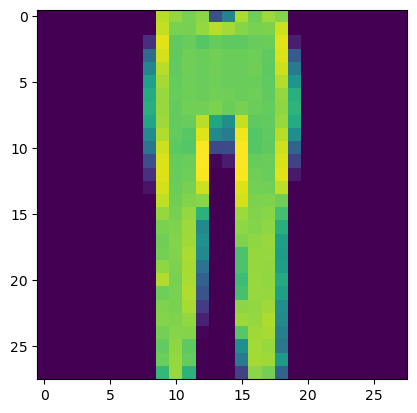

In [8]:
#레이블 정의
fashion_mnist_labels = ["T-shirt/top", #인덱스0
                        "Trouser", #인덱스1
                        "Pullover", #인덱스2
                        "Dress", #인덱스3
                        "Coat", #인덱스4
                        "Sandal", #인덱스5
                        "Shirt", #인덱스6
                        "Sneaker", #인덱스7
                        "Bag", #인덱스8
                        "Ankle boot"] #인덱스9
img_index = 106
label_index = y_train[img_index]
plt.imshow(x_train[img_index])

2. 데이터 분리 및 정제

In [9]:
x_train - x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
# 입력 이미지의 크기를 (28,28)에서 (28,28,1)로 배열 차원을 변경(reshape)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0],w,h,1)
x_test = x_test.reshape(x_test.shape[0],w,h,1)

In [11]:
#레이블에 원-핫 인코딩 적용 
#원-핫 벡터는 단 하나의 차원에서만 1이고, 나머지 차원에서는 0인 벡터입니다.
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

3. 모델 생성

In [13]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dropout, Flatten, Dense
modelDim = x_train[0].shape
model = keras.Sequential()

#신경망의 첫번째 레이어에서 입력 데이터 크기를 정의해야합니다.
model.add(Conv2D(filters=32, kernel_size=2,
                 padding='same',
                 activation='relu',
                 input_shape=modelDim))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)         

In [17]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='model.plot.png', show_shapes=True,
           show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


4. 모델 컴파일

In [19]:
#Sequential 방식 keras 모델
#손실함수(LOSS) : 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
#손실함수를 기반으로 Nueral Net 업데이터 결정 (mse, mae, accuracy)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

5. 모델 훈련

In [20]:
import os 
from datetime import datetime

In [21]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
datetime.now().strftime("%Y%m%d_%H%M%S")

'20230918_211122'

In [23]:
logdir = os.path.join("logs_c", datetime.now().strftime("%Y%m%d_%H%M%S"))
logdir

'logs_c\\20230918_211211'

In [26]:
callbacks = [
    TensorBoard(
    log_dir = logdir),
    
    EarlyStopping(monitor="val_loss", patience=10),
    
    ModelCheckpoint(filepath="model_mnist_weigth.h5",
                   monitor='val_accuracy',verdose=1, save_best_only=True, mode='max')
]

In [27]:
#텐서를 CPU에 할당
#with tf.device('/GPU:0')
history = model.fit(x_train, y_train, 
                   epochs= 10,
                   batch_size = 32,
                   shuffle=True,
                   callbacks=callbacks,
                   validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 15s 6ms/step - loss: 2.4844 - accuracy: 0.5921 - val_loss: 0.5981 - val_accuracy: 0.7919
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7371 - accuracy: 0.7270 - val_loss: 0.5239 - val_accuracy: 0.8243
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.6450 - accuracy: 0.7637 - val_loss: 0.4547 - val_accuracy: 0.8413
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5945 - accuracy: 0.7826 - val_loss: 0.4547 - val_accuracy: 0.8475
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5578 - accuracy: 0.7940 - val_loss: 0.4295 - val_accuracy: 0.8426
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5394 - accuracy: 0.8018 - val_loss: 0.4066 - val_accuracy: 0.8547
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5275 - accuracy: 0.8055 - val_loss: 0.4116 - val_accuracy

6. 모델추론

In [29]:
#verbose: 정보표시 레벨(0,1)
test_loss,test_acc = model.evaluate(x_test, y_test, verbose=1)
print(test_loss, test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 3.5234 - accuracy: 0.1000
3.52337646484375 0.10000000149011612


7. 모델 예측

In [30]:
# 테스트 데이터 1개 추출
testImg = x_test[190]
# 테스트 데이터 1개 답지 확인(바지)
y_test[190]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

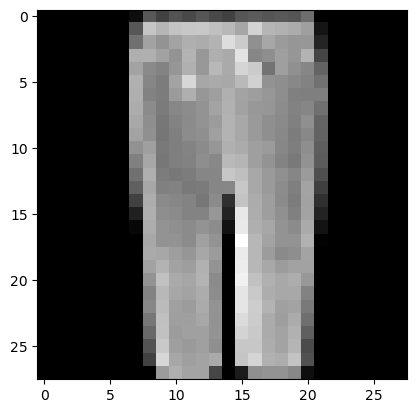

In [32]:
# 테스트 데이터 이미지로 변환
testImg2 = testImg*255
testImg3 = testImg2.reshape(28,28)
plt.imshow(testImg3, cmap="gray")

In [33]:
#데이터 정제 작업 수행
testImg4 = testImg3/255
testImg5 = testImg4.reshape(1,28,28,1)

In [34]:
#예측 수행
test_predictions = model.predict(testImg5)
test_predictions

1/1 [==============================] - 0s 134ms/step


array([[0.02947646, 0.08383537, 0.00253059, 0.01052572, 0.00227665,
        0.59222496, 0.01278882, 0.09541317, 0.14067705, 0.03025122]],
      dtype=float32)